### Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

### Pie Plot

'Male=0, Female=1, Group=2'

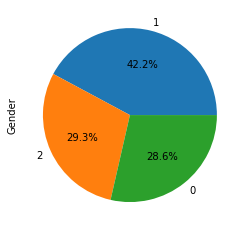

In [2]:
#how many from each gender participated in all contests
result = pd.read_csv('songs.csv')
result["Gender"].value_counts().plot(kind='pie',autopct='%1.1f%%')
"""Male=0, Female=1, Group=2"""

### Bar Plots

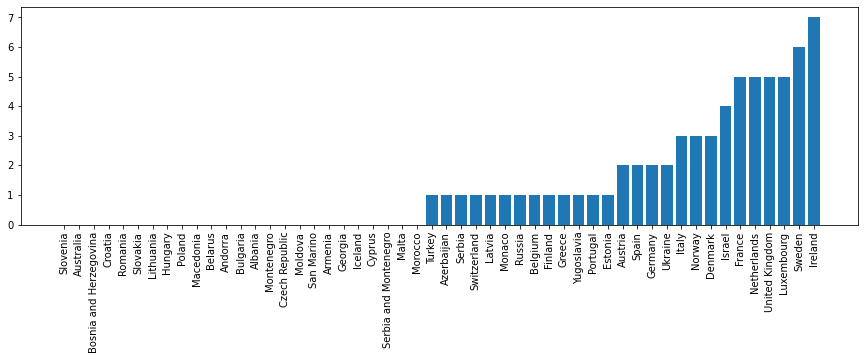

In [3]:
#how many winnings for each country
winnercondition=result["Placing in finals"] == 1
winners_df = result[winnercondition].copy()
winners_df.reset_index(drop=True, inplace=True)
del winners_df["Unnamed: 0"]
countries=result["Country"].copy()
countries = list(dict.fromkeys(countries))
count_winnings_for_country={}
for country in countries:
    condition= winners_df["Country"]==country
    count_winnings_for_country[country]=int(sum(condition))
index=range(0,len(countries))
columns=['Country', 'Amount of winnings']
countrywinningsdf=pd.DataFrame(index=index, columns=columns)
countrywinningsdf["Country"]=count_winnings_for_country
countrywinningsdf["Amount of winnings"]=count_winnings_for_country.values()
amount_of_winnings_list=list(countrywinningsdf["Amount of winnings"])
countrywinningsdf.sort_values("Amount of winnings",inplace=True)
plt.figure(figsize=(15,4))
plt.bar(countrywinningsdf["Country"],countrywinningsdf["Amount of winnings"])
plt.xticks(rotation=90)
plt.show()

'Male=0, Female=1, Group=2'

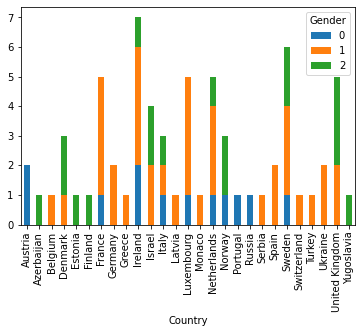

In [4]:
#countries winners by gender
pd.crosstab(winners_df['Country'],winners_df['Gender']).plot(kind="bar",stacked=True)
"""Male=0, Female=1, Group=2"""

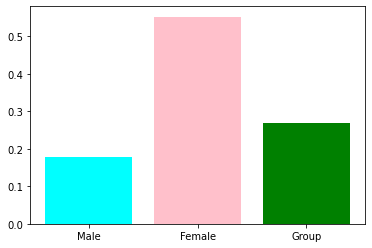

In [5]:
#normalized winners by gender
winners_gender=dict(winners_df['Gender'].value_counts(ascending=True,normalize=True))
winners_gender["Male"] = winners_gender.pop(0)
winners_gender["Female"] = winners_gender.pop(1)
winners_gender["Group"] = winners_gender.pop(2)
plt.bar(range(len(winners_gender)), list(winners_gender.values()), align='center',color=['cyan', 'pink', 'green'])
plt.xticks(range(len(winners_gender)), list(winners_gender.keys()))
plt.show()

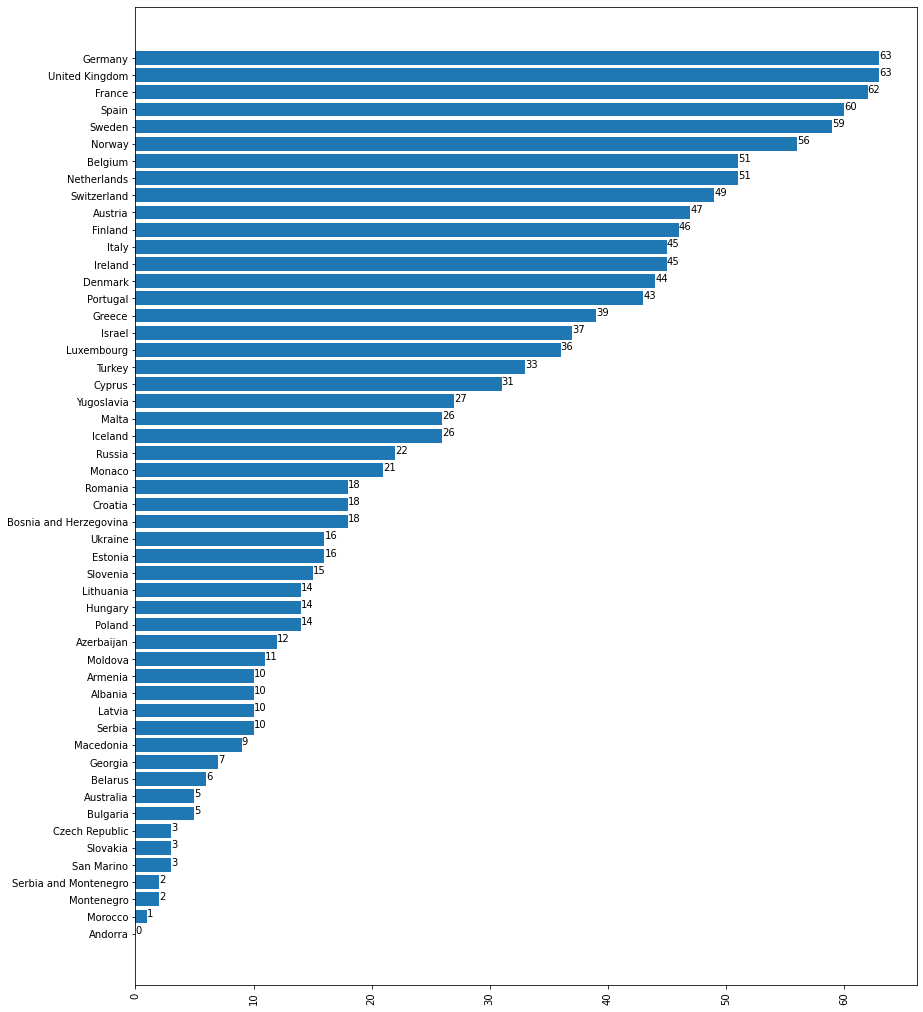

In [6]:
#how many finalists from every country
finalcondition=result["Was in final"] == 1
finalist_df = result[finalcondition].copy()
finalist_df.reset_index(drop=True, inplace=True)
del finalist_df["Unnamed: 0"]
count_country_in_finals={}
for country in countries:
    condition= finalist_df["Country"]==country
    count_country_in_finals[country]=int(sum(condition))
columns=['Country', 'Amount of times in finals']
index=range(0,len(countries))
countryfinalistsdf=pd.DataFrame(index=index, columns=columns)
countryfinalistsdf["Country"]=count_country_in_finals
countryfinalistsdf["Amount of times in finals"]=count_country_in_finals.values()
countryfinalistsdf["Amount of winnings"]=amount_of_winnings_list
#countryfinalistsdf["Amount of times in finals"]=countryfinalistsdf["Amount of times in finals"]
countryfinalistsdf.sort_values("Amount of times in finals",inplace=True)
top15finalist=list(countryfinalistsdf["Country"].tail(15))
plt.figure(figsize=(14,18))
plt.barh(countryfinalistsdf["Country"],countryfinalistsdf["Amount of times in finals"])
plt.xticks(rotation=90)
sorted_amount_of_times_in_final=list(countryfinalistsdf["Amount of times in finals"])
for val_index, value in enumerate(sorted_amount_of_times_in_final):
    plt.text(value, val_index, str(value))
plt.show()

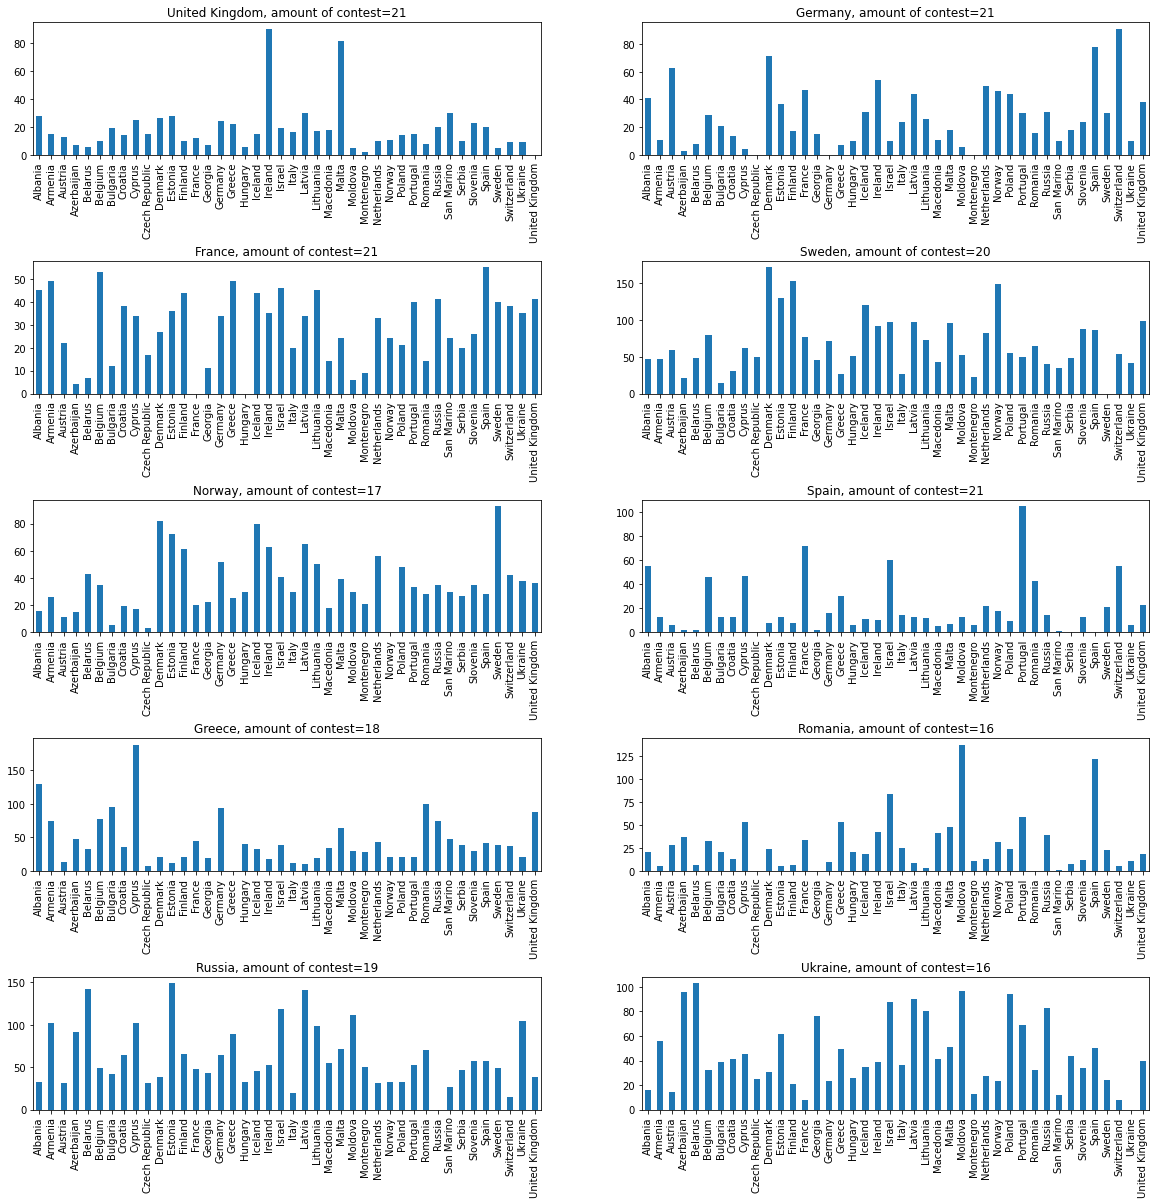

In [7]:
#every country's points from jury by country
finalcondition=result["Was in final"] == 1
finalist_df = result[finalcondition].copy()
finalist_df.reset_index(drop=True, inplace=True)
df=pd.DataFrame(columns=["Amount of contests"])
#df["Amount of contests"]=10*[0]
del finalist_df["Unnamed: 0"]
count_country_in_finals={}
count=0
for country in countries:
    countrydf= finalist_df[finalist_df["Country"]==country]
    countrydf.drop(['Country','Artist','Song','Language','Running order in semi','Placing in semi','Running order in finals','Placing in finals','Country won last year','Country is hosting','Gender','Total score','Televoting score','Was in final','Which semi-final'],axis=1,inplace=True)
    countrydf.drop(['Australia','Serbia and Montenegro','Andorra','Slovakia','Bosnia and Herzegovina','Morocco','Turkey','Yugoslavia','Monaco','Luxembourg'],axis=1,inplace=True)
    countrydf= countrydf[countrydf["Year"]>1999]
    if len(countrydf)>15:
        del countrydf["Year"]
        del countrydf[country]
        countrydf.loc[country] = countrydf.select_dtypes(pd.np.number).sum()
        df=df.append(countrydf.loc[country])
        df.iloc[count,df.columns.get_loc("Amount of contests")]=len(countrydf)-1
        count=count+1
amount_of_contest=list(df["Amount of contests"])
df=df.drop(["Amount of contests"],axis=1)
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.8)
for row in range(len(df)):
    titleofsub=df.index[row]+", amount of contest="+str(amount_of_contest[row])
    if row%2==0:
        df.iloc[row].plot(ax=axes[row//2,0],title=titleofsub,x='index', y=['Albania','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Israel','Italy','Latvia','Lithuania','Macedonia','Malta','Moldova','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom'], kind="bar")
    else:
        df.iloc[row].plot(ax=axes[row//2,1],title=titleofsub,x='index', y=['Albania','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Israel','Italy','Latvia','Lithuania','Macedonia','Malta','Moldova','Montenegro','Netherlands','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovenia','Spain','Sweden','Switzerland','Ukraine','United Kingdom'], kind="bar")

### Scatter Plots

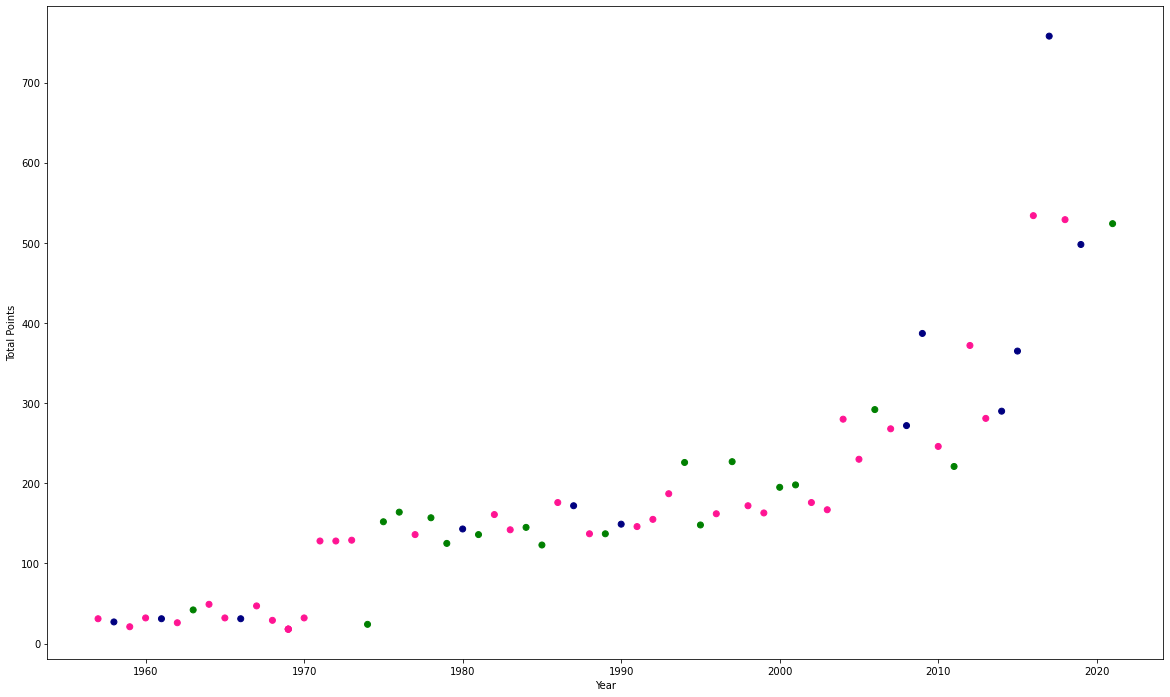

'Male: Nave Blue, Female: Deep Pink, Group: Green'

In [8]:
#winners points by gender throw the years
winner_points=winners_df[['Year','Gender','Total score']]
colormap = np.array(['navy', 'deeppink', 'green'])
plt.figure(figsize=(20,12))
plt.scatter(x=winner_points['Year'],y=winner_points['Total score'],c=colormap[winner_points.Gender])
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.show()
"""Male: Nave Blue, Female: Deep Pink, Group: Green"""


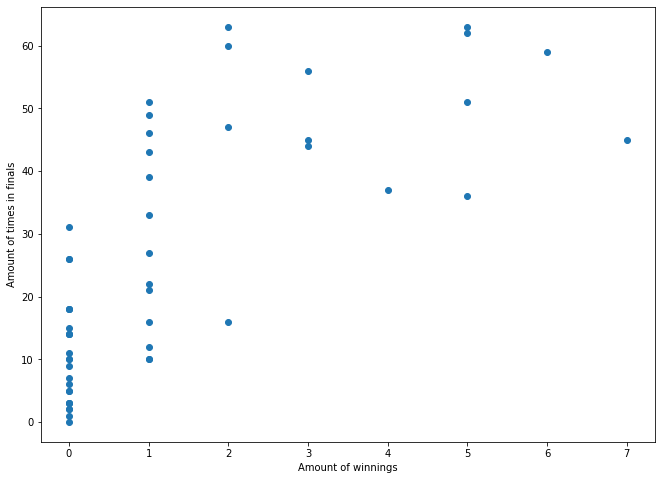

In [9]:
#Amount of winnings as function of amount of times in finals
sorted_countries=list(countryfinalistsdf["Country"])
fig = plt.figure(figsize=(11,8))
x=countryfinalistsdf["Amount of winnings"]
y=countryfinalistsdf["Amount of times in finals"]
ax = plt.axes()
ax.scatter(x,y)
plt.ylabel('Amount of times in finals')
plt.xlabel('Amount of winnings')
plt.show()